In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from glob import glob
import eval_util, pred_util, submission_util
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

Using TensorFlow backend.


In [3]:
def show_log(dir_name, fold='1',col=None, show_params=True):
    log_file_path = '/data/pneumo_log/val_' +fold + '/' + dir_name + '/training.log'
    log = pd.read_csv(log_file_path)
    if col is not None:
        log = log[col]
    log.plot(x='epoch')
#     if show_params:
#         show_train_params(dir_name)
    return log

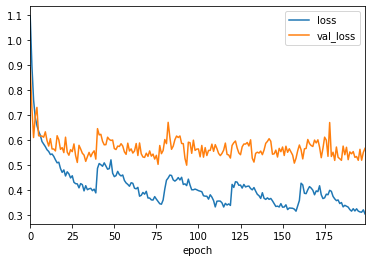

In [4]:
log = show_log('2019_0817_2029',fold='1',col=['loss', 'val_loss','epoch'])


In [5]:
best_index = log['val_loss'].idxmin()
log.iloc[best_index]

loss         0.418586
val_loss     0.500206
epoch       93.000000
Name: 93, dtype: float64

In [6]:
fold='1'
dir_name = '2019_0817_2029'
log_file_path = '/data/pneumo_log/val_' +fold + '/' + dir_name + '/training.log'
log = pd.read_csv(log_file_path)

In [7]:
cols = ['epoch',
      'dice_coef_flat',
      'val_dice_coef_flat',
      'val_dice_coef',
      'dice_coef',
      'my_dice_metric',
      'val_my_dice_metric']


In [8]:
# log

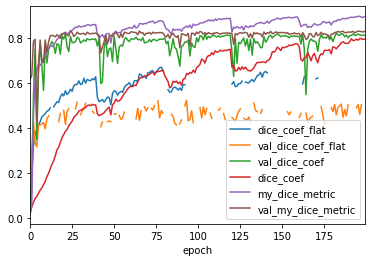

In [9]:
log = show_log('2019_0817_2029',fold='1',col=cols)


In [10]:
best_index = log['val_my_dice_metric'].idxmax()
log.iloc[best_index]

epoch                 24.000000
dice_coef_flat         0.573186
val_dice_coef_flat          NaN
val_dice_coef          0.809023
dice_coef              0.421041
my_dice_metric         0.831467
val_my_dice_metric     0.834655
Name: 24, dtype: float64

In [36]:
# log

In [2]:

pred_util.save_preds_all_models(model_base_path='/data/pneumo_log/val_1/2019_0817_2029/',
                     data_path='/data/pneumo/fold/1/',
                     tta=False)
# pred_util._save_preds(model_path='/data/pneumo_log/val_1/2019_0815_1742/best_weights.hdf5', data_path='/data/pneumo/fold/1/')


start pred with /data/pneumo_log/val_1/2019_0817_2029/snapshot_model_4.h5
Instructions for updating:
Shapes are always computed; don't use the compute_shapes as it has no effect.


  0%|          | 0/2135 [00:00<?, ?it/s]

saving dirs: /data/pneumo_log/val_1/val_predictions/2019_0817_2029/snapshot_model_4/




KeyboardInterrupt



In [67]:
df = eval_util.eval_all_models_pred(pred_data_dir_base='/data/pneumo_log/val_1/val_predictions/2019_0817_2029/',
                               ensemble=True, score_column_name='score')








  0%|          | 0/2135 [00:00<?, ?it/s]






  0%|          | 1/2135 [00:00<28:17,  1.26it/s]






  0%|          | 2/2135 [00:00<21:17,  1.67it/s]






  0%|          | 3/2135 [00:01<16:14,  2.19it/s]






  0%|          | 8/2135 [00:02<14:12,  2.49it/s]






  0%|          | 10/2135 [00:02<11:35,  3.06it/s]






  1%|          | 18/2135 [00:03<08:34,  4.11it/s]






  1%|          | 19/2135 [00:03<08:25,  4.18it/s]






  1%|          | 22/2135 [00:04<08:36,  4.09it/s]






  1%|▏         | 28/2135 [00:04<06:27,  5.44it/s]






  1%|▏         | 30/2135 [00:05<09:20,  3.75it/s]






  2%|▏         | 38/2135 [00:05<07:17,  4.79it/s]






  2%|▏         | 40/2135 [00:06<05:58,  5.84it/s]






  2%|▏         | 44/2135 [00:06<04:35,  7.59it/s]






  2%|▏         | 47/2135 [00:07<06:31,  5.33it/s]






  2%|▏         | 49/2135 [00:07<06:47,  5.12it/s]






  2%|▏         | 51/2135 [00:08<08:42,  3.99it/s]






  3%|▎         | 62/2135 [00:08<06:11,  5.59it/s]






,score,image_id,thresh
0,1.000000,1.2.276.0.7230010.3.1.4.8323329.2993.151787517...,0.5
1,1.000000,1.2.276.0.7230010.3.1.4.8323329.3991.151787518...,0.5
2,1.000000,1.2.276.0.7230010.3.1.4.8323329.4267.151787518...,0.5
3,1.000000,1.2.276.0.7230010.3.1.4.8323329.11516.15178752...,0.5
4,1.000000,1.2.276.0.7230010.3.1.4.8323329.4864.151787518...,0.5
5,1.000000,1.2.276.0.7230010.3.1.4.8323329.4669.151787518...,0.5
6,1.000000,1.2.276.0.7230010.3.1.4.8323329.10320.15178752...,0.5
7,1.000000,1.2.276.0.7230010.3.1.4.8323329.3744.151787517...,0.5
8,1.000000,1.2.276.0.7230010.3.1.4.8323329.1878.151787517...,0.5
9,0.000000,1.2.276.0.7230010.3.1.4.8323329.11580.15178752...,0.5


In [13]:
# pred_data_dir='/data/pneumo_log/val_1/val_predictions/2019_0815_1742/best_weights/'
# df= eval_util.eval_all_pred(pred_data_dir='/data/pneumo_log/val_1/val_predictions/2019_0815_1742/best_weights/')
df.groupby('thresh').mean()

ValueError: operands could not be broadcast together with shapes (21,) (5,) (21,) 

## Subimssion

In [6]:
import submission_util
model_path = '/data/pneumo_log/val_1/2019_0808_0447/best_weights.hdf5'
thresh=0.05
submission_util.make_submission(model_path, thresh)

100%|██████████| 1372/1372 [16:47<00:00,  1.41it/s]


## Emsemble of snapshots for submission

In [2]:
model_base_path = '/data/pneumo_log/val_1/2019_0815_1742/'
model_path_list = glob(model_base_path + '/*[.h5, .hdf5]')

In [3]:
model_path_list

['/data/pneumo_log/val_1/2019_0815_1742/snapshot_model_2.h5',
 '/data/pneumo_log/val_1/2019_0815_1742/best_weights.hdf5',
 '/data/pneumo_log/val_1/2019_0815_1742/snapshot_model_1.h5',
 '/data/pneumo_log/val_1/2019_0815_1742/snapshot_model_3.h5']

In [ ]:
submission_util.make_ensemble_submission(model_path_list)

start making ensemble submission under /data/pneumo_log/val_1/2019_0815_1742/ensemble_submission/
start pred test data by /data/pneumo_log/val_1/2019_0815_1742/snapshot_model_2.h5
start pred test data by /data/pneumo_log/val_1/2019_0815_1742/best_weights.hdf5
start pred test data by /data/pneumo_log/val_1/2019_0815_1742/snapshot_model_1.h5
start pred test data by /data/pneumo_log/val_1/2019_0815_1742/snapshot_model_3.h5






  0%|          | 0/1372 [00:00<?, ?it/s]



  0%|          | 1/1372 [00:00<12:07,  1.88it/s]



  1%|          | 7/1372 [00:00<08:36,  2.64it/s]



  2%|▏         | 23/1372 [00:00<06:01,  3.73it/s]



  2%|▏         | 29/1372 [00:01<04:31,  4.94it/s]



  3%|▎         | 38/1372 [00:01<03:16,  6.78it/s]



  3%|▎         | 47/1372 [00:01<02:21,  9.36it/s]



  4%|▍         | 53/1372 [00:01<01:52, 11.76it/s]



  4%|▍         | 58/1372 [00:01<01:30, 14.53it/s]



  5%|▍         | 66/1372 [00:01<01:08, 19.07it/s]



  5%|▌         | 71/1372 [00:02<00:58, 22.40it/s]



  6%|▌         | 76/1372 [00:02<00:55, 23.36it/s]



  6%|▌         | 81/1372 [00:02<00:54, 23.79it/s]



  7%|▋         | 93/1372 [00:02<00:44, 28.79it/s]



  7%|▋         | 98/1372 [00:02<00:40, 31.13it/s]



  8%|▊         | 103/1372 [00:02<00:39, 31.90it/s]



  8%|▊         | 112/1372 [00:03<00:42, 29.73it/s]



  9%|▉         | 125/1372 [00:03<00:34, 35.70it/s]



 10%|▉         | 134/1372 [00:03<00:30, 40.66it/s]